In [1]:
import requests
import zipfile
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback

In [2]:
# import requests
# url = 'https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'

# response = requests.get(url)
# with open('data/sign_language_img.zip', 'wb') as f:
#     f.write(response.content)

In [3]:
# # En donde tenemos el archivo local?
# local_zip = 'data/sign_language_img.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# # En donde lo vamos a extraer? como se llamará la carpeta?
# zip_ref.extractall('data/sign_language_img')
# zip_ref.close()

# # Esto es opcional, pero yo prefiero eliminar el archivo zip
# os.remove(local_zip)

In [4]:
train_dir = 'data/sign_language_img/Train'
test_dir = 'data/sign_language_img/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
# Básicamente me crea una lista del abecedario exceptuando las que puse
clases = [char for char in string.ascii_uppercase if char!='J' if char != 'Z']

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

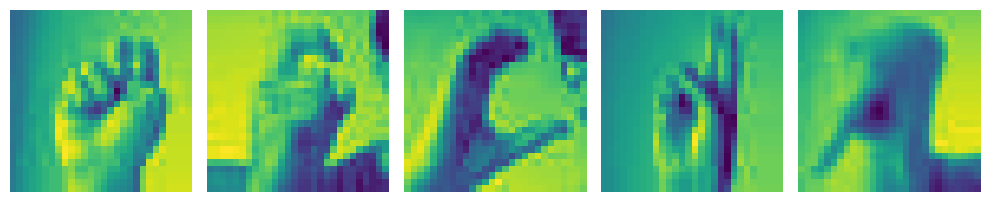

In [9]:
# Un generador siempre se usa con next
sample_training_images,_ = next(train_generator)
plotImages(sample_training_images[:5])

In [10]:
model_base = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_base.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20


d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 217s 913ms/step - accuracy: 0.2201 - loss: 2.6898 - val_accuracy: 0.4618 - val_loss: 1.6943
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.5789 - loss: 1.3558 - val_accuracy: 0.5860 - val_loss: 1.3160
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6986 - loss: 0.9626 - val_accuracy: 0.6246 - val_loss: 1.1872
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7715 - loss: 0.7360 - val_accuracy: 0.6140 - val_loss: 1.2129
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8346 - loss: 0.5510 - val_accuracy: 0.6772 - val_loss: 1.0304
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.8779 - loss: 0.4230 - val_accuracy: 0.6800 - val_loss: 1.0421
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9046 - loss: 0.3310 - val_accuracy: 0.7207 - val_loss: 0.9785
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9386 - loss: 0.2395 - val_accur

In [13]:
model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 636ms/step - accuracy: 0.7750 - loss: 1.1111


[1.0875312089920044, 0.7783045172691345]

In [14]:
def visualizacion_resultados(hist):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    
    ax[0].plot(epochs, train_acc, 'go-', label='Train accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Val accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].plot(epochs, train_loss, 'g*-', label='Train loss')
    ax[1].plot(epochs, val_loss, 'r*-', label='Val loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")   

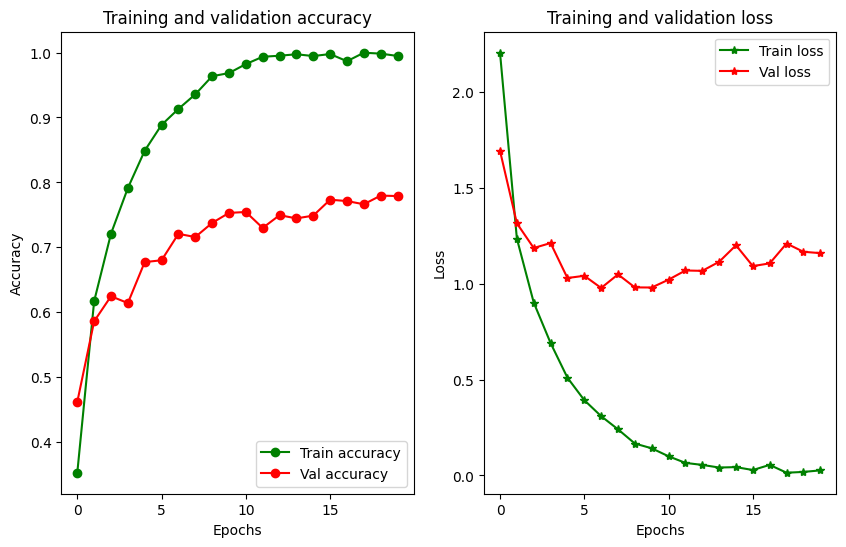

In [15]:
visualizacion_resultados(hist)

In [16]:
model_optimizer = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_optimizer.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
model_optimizer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.1419 - loss: 2.8788 - val_accuracy: 0.4512 - val_loss: 1.7537
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.4492 - loss: 1.6765 - val_accuracy: 0.5481 - val_loss: 1.4058
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5886 - loss: 1.2403 - val_accuracy: 0.6365 - val_loss: 1.1829
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6629 - loss: 1.0103 - val_accuracy: 0.6505 - val_loss: 1.0485
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7255 - loss: 0.8260 - val_accuracy: 0.6730 - val_loss: 1.0017
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7667 - loss: 0.6978 - val_accuracy: 0.7039 - val_loss: 0.9539
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7923 - loss: 0.6115 - val_accuracy: 0.7144 - val_loss: 0.8903
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8227 - loss: 0.5229 - 

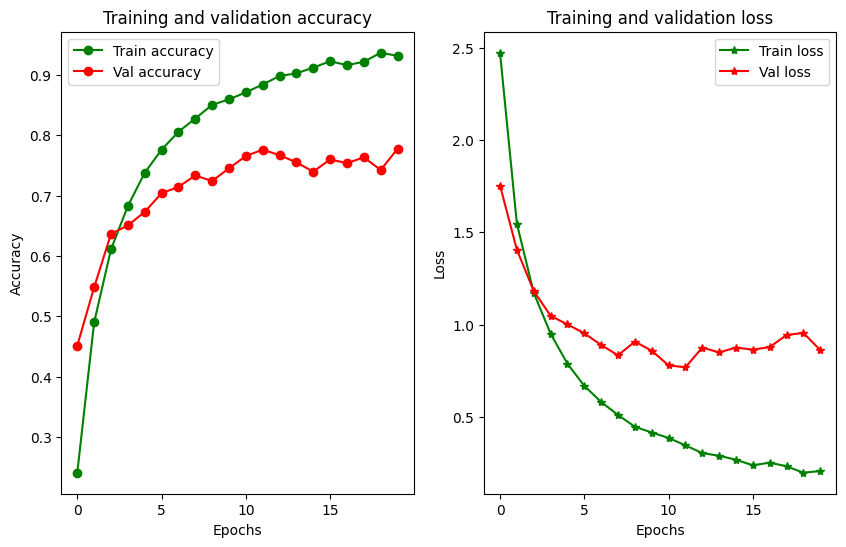

In [19]:
visualizacion_resultados(hist_optimizer)

In [20]:
model_convul = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_convul.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_convul.summary()

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist_convul = model_convul.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.1833 - loss: 2.7390 - val_accuracy: 0.6772 - val_loss: 1.0313
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7241 - loss: 0.8471 - val_accuracy: 0.8000 - val_loss: 0.6464
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 131s 612ms/step - accuracy: 0.8853 - loss: 0.3754 - val_accuracy: 0.8204 - val_loss: 0.6071
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 44s 199ms/step - accuracy: 0.9491 - loss: 0.1921 - val_accuracy: 0.8386 - val_loss: 0.5727
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9738 - loss: 0.1146 - val_accuracy: 0.8386 - val_loss: 0.5727
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9853 - loss: 0.0749 - val_accuracy: 0.8330 - val_loss: 0.6118
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.9888 - loss: 0.0616 - val_accuracy: 0.8498 - val_loss: 0.6253
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9909 - loss: 0.052

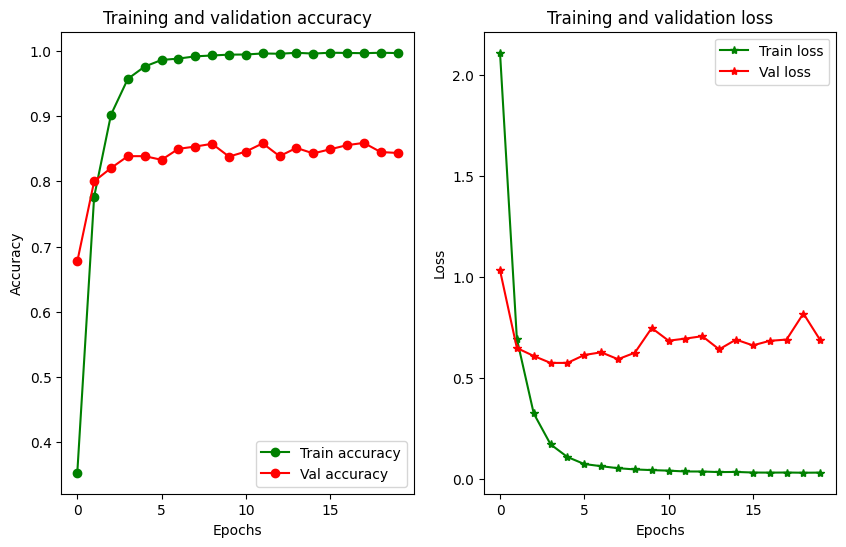

In [22]:
visualizacion_resultados(hist_convul)

In [23]:
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_callback.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_callback.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            self.model.stop_training = True

In [25]:
callback = TrainingCallback()

In [26]:
hist_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks=[callback],
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.2097 - loss: 2.6823 - val_accuracy: 0.7074 - val_loss: 0.9448
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7963 - loss: 0.6519 - val_accuracy: 0.8049 - val_loss: 0.6208
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9297 - loss: 0.2528 - val_accuracy: 0.8175 - val_loss: 0.5847
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9683 - loss: 0.1397 - val_accuracy: 0.8358 - val_loss: 0.5690


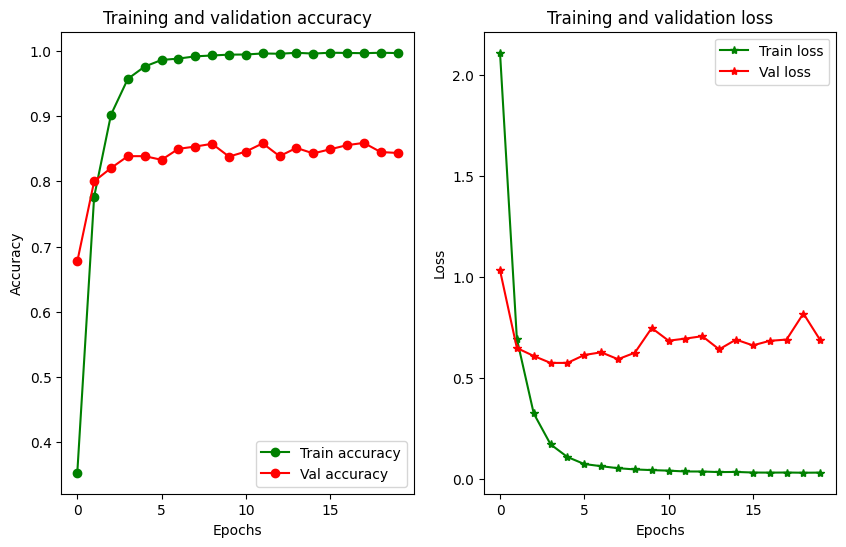

In [27]:
visualizacion_resultados(hist_convul)

In [28]:
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(clases), activation='softmax')
    ])
    return model

model_early = get_model()
model_early.summary()
model_early.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='auto')

hist_early = model_early.fit(
    train_generator,
    epochs=20,
    callbacks=[callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.2006 - loss: 2.6678 - val_accuracy: 0.7011 - val_loss: 1.0057
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.7621 - loss: 0.7529 - val_accuracy: 0.7839 - val_loss: 0.6869
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.9045 - loss: 0.3203 - val_accuracy: 0.8063 - val_loss: 0.6105
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9615 - loss: 0.1604 - val_accuracy: 0.8267 - val_loss: 0.6372
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9811 - loss: 0.0936 - val_accuracy: 0.8372 - val_loss: 0.6435
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9872 - loss: 0.0683 - val_accuracy: 0.8449 - val_loss: 0.6549
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9910 - loss: 0.0546 - val_accuracy: 0.8449 - val_loss: 0.6569
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 28s 130ms/step - accuracy: 0.9935 - loss: 0.0468 

In [30]:
import kerastuner as kt

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9536\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [36]:
def constructor_modelos(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    
    hp_units = hp.Int("units", min_value=32, max_value=512, step = 32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(clases), activation='softmax'))
    
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return model

In [37]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='models/',
    project_name='kt_hyperband'
)

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
tuner.search(train_generator, epochs=20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 06m 22s]
val_accuracy: 0.8407017588615417

Best val_accuracy So Far: 0.8750877380371094
Total elapsed time: 01h 13m 30s


In [39]:
print(best_hps.get('units'))

320


In [40]:
print(best_hps.get('learning_rate'))

0.01


In [42]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodoel = hypermodel.fit(train_generator, epochs=20, callbacks=[callback_early], validation_data=validation_generator)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 72s 318ms/step - accuracy: 0.4104 - loss: 2.1013 - val_accuracy: 0.8091 - val_loss: 0.7390
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 112ms/step - accuracy: 0.9595 - loss: 0.1865 - val_accuracy: 0.8253 - val_loss: 0.7585
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.9789 - loss: 0.1327 - val_accuracy: 0.8154 - val_loss: 1.0069
